<img src="images/GMIT logo.jpeg" width="350" align="center">

# Programming for Data Analysis Project 2019

<b>Name:</b> Peter McGowan<br>
<b>ID:</b> G00190832

### Introduction

This Jupyter notebook contains a simulated dataset created for the "Programming for Data Analysis" Module project on the GMIT HDip in Data Analytics.

### Tasks:
1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.
3. Synthesise/simulate a data set as closely matching their properties as possible.
4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Background

I have chosen to simulate data about Adult Education in Ireland. I have chosen the following variables:
* Highest Qualification Awarded
* Field of Study
* Gender
* Age

## Research and Investigate

### General

The Central Statistics Office (CSO) is perhaps best known for carrying out a census every 5 years in Ireland (most recently in 2016). In addition to this, the CSO carries out a range of other important statistical work covering a broad range of themes on a rotational basis.

The General Household Survey occurs approximately quarterly and the theme varies. In Q3 & Q4 2019 the theme covered was Adult Education. Considering the HDip in Data Analytics and the makeup of its student cohort (myself included), the Adult Education Survey (AES) immediately piqued my interest when I came across it.

[CSO Adult Education Survey 2017](https://www.cso.ie/en/releasesandpublications/er/aes/adulteducationsurvey2017/)

Considering the results of this survey and the characteristics of its variables studied, I will simulate a dataset matching its qualities.

### Sample Data Characteristics

The design sample size for the survey carried out was 13,200. Of this, 4,863 valid responses were collated. I intend to simulate the 334 <i>"Persons aged 25-64 who participated in formal education, classified by the level of education participation."</i>

### Level of Education Participation

The AES aggregates these levels into four categories for my sample group. I have assigned a three-digit code to each for ease of use in analysis:
* SEC: Higher Secondary or Below
* PLC: Post Leaving Certificate
* 3LO: Third Level Non-Honours Degree
* 3LH: Third Level Honours Degree or Higher

I will simulate a dataset approximating this range, with 4 categories.

### Field of Study

The AES categories education into 12 different fields. I have assigned a three-digit code to each for ease of use in analysis:
* GEN: General Programmes & Qualifications
* EDU: Education
* ART: Arts and Humanities
* SOC: Social Sciences, Journalism and Information
* BUS: Business, Administration and Law
* NAT: Natural Sciences, Mathematics and Statistics
* INF: Information and Communication Technologies
* ENG: Engineering, Manufacturing and Construction
* AGR: Agriculture, Forestry, Fisheries and Veterinary
* HEA: Health and Welfare
* SER: Services
* OTH: Other

The AES does <u>not</u> tell us if or how the educational category is related to the level of qualification, in other words the variables are (apparently) independent of each other, however they may both be related to other variables.

### Gender

The gender breakdown of those who participated in an educational activity as given in the AES report is:
* Male: 36.53%
* Female: 63.47%

The survey would indicate that females are almost twice as likely to participate in adult education. The simulated dataset will therefore reflect this.

Comparing percentages of males vs females participating in each educational field is interesting, with many fields being strongly weighted towards one gender.
Looking at how gender relates to level of education participation, it is also clear that gender is correlated with field of study. For example, males are actually twice as likely to study at 3rd Level non honours degree than females.

The gender for each row in the simulated data will therefore have to take into account three things:
* Overall gender ratio participating in adult education
* Gender ratio for each level of education participation
* Gender ratio for each field of study

This is beginning to get quite complex!

### Age

The age range covered by the survey was 18-64, however the results are presented only from ages 25-64. This gives me a convenient range for the simulated ages. Results were presented in the following bands:
* 25-34 year olds
* 35-44 year olds
* 45-54 year olds
* 55-64 year olds

In constructing the dataset it will not be necessary to limit the simulated ages to these bands - I will use the 2016 census data to generate an appropriate distribution.

Much like the gender variable, age relates to both level of education participation and field of study. Are age and gender also related? The AES doesn't actually tell us this - presumably this is due to the sample size, as this can be ascertained for those participating in non-formal education. The 2016 Census cannot provide any more information here either.

It would be reasonable to presume that there is a good chance that age and gender are related here but I have no way of directly controlling it - this will have to be simulated indirectly through the other relationships. Age will therefore have to take into account:
* Overall age ranges and their likely distributions
* Age distribution for each level of education participation
* Age distribution for each field of study

### Approach

The approach to take now bears some serious consideration - considering the indirect relationships that have to be modelled, the order of variables modelled will be critical. I will therefore take the following approach:
1. Simulate the ages first - this will require the combination of distributions for each each range given, based on actual age distributions from the 2016 Census;
2. Simulate field of study - the relative probability of each field will take into account the age (range) of the simulated person;
3. Simulate the level of education participation - the relative probability of each level will take into account the age (range) of the simulated person;
4. Simulate the gender - this must take into account both items 2 and 3, as well as the overall gender ratio in the sample.

## Synthesise

### Preliminaries

Firstly, import several libraries to manage, simulate and visualise.

In [1]:
# Import numpy to analyse it
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Magic command to ensure that plots render inline
%matplotlib inline

In [3]:
# Control Seaborn aesthetics
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")

## Generate Data

First we will create an empty pandas dataframe to hold the data.

In [4]:
df = pd.DataFrame()

### Age Data

The age distribution should be realistic. We will import data from the Central Statistics Office that describes the ages recorded by the 2016 Census. Although this is a measure of the distribution of ages of the entire population, we will assume that the distribution holds true for our sample set.

The data has been generated and downloaded as a csv from [Statbank](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=E3002&PLanguage=0).
Only ages from 25 to 64 have been considered. I have extracted the data required to a csv file in order to read it in to a new DataFrame for some basic analysis.

#### Import Age Data & Analyse

In [5]:
f = pd.read_csv("data\Population_2016_by_Age_adj.csv") # Import csv file using pandas
dfAge = pd.DataFrame(f) # Create a dataframe from the csv data
round(dfAge.describe(),2)

,Age,Male,Female,Total
count,40.00,40.00,40.00,40.00
mean,44.50,31263.00,32269.35,63532.35
std,11.69,4761.64,5265.15,9984.04
min,25.00,22402.00,22642.00,45044.00
25%,34.75,28163.75,28551.50,56858.50
50%,44.50,30787.00,31522.00,62390.00
75%,54.25,35342.75,35973.75,71409.00
max,64.00,40892.00,42304.00,83196.00


There is a lot of data here - a visualisation would be appropriate. I can generate a relational plot in Seaborn to relate Age to population numbers.

Text(0.5, 1, 'Distribution of Ages')

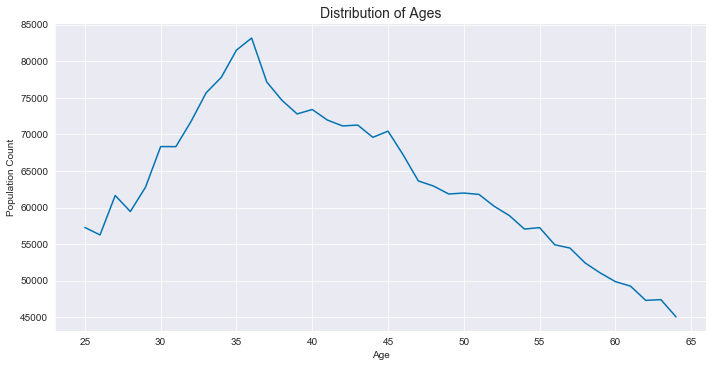

In [6]:
sns.relplot(x="Age", y="Total", kind="line", data=dfAge, height=5, aspect=2) # Use aspect to make plot wider
plt.xlabel('Age')
plt.ylabel('Population Count')
plt.title('Distribution of Ages', fontsize=14)

The age profile rapidly rises from 25 to the mode (somewhere slightly above 35) and then generally reduces more gradually towards 64. It doesn't look like a Normal (Gaussian) distribution (a common assumption for population distribution) (Mordkoff, 2019) - but thankfully NumPy's random package includes a wide range of alternative distributions. The [numpy.random.triangular](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.triangular.html) function looks like a good option: 
> The triangular distribution is often used in ill-defined problems where the underlying distribution is not known, but some knowledge of the limits and mode exists. Often it is used in simulations. (Docs.scipy.org, 2019)

This looks (almost) ideal. Although the two "diagonals" of the triangle aren't perfectly linear, it should be possible to simulate and approximation, particularly since the numpy functions I'll use will introduce some randomness. I will now need to carry out some more complex statistical analysis of the input data. Simply returning the mean or standard deviation of the ages will not prove very useful here as they need to be weighted by the population (Statistics How To, 2019). The statsmodels package has a "descriptive statistics with weights" module (DescrStatsW) that will be very useful, I can import that first.

#### Weighted Stats

In [7]:
from statsmodels.stats.weightstats import DescrStatsW

Now I can use it to generate a weighted age profile from the Age and Total (population) columns.

In [8]:
wAge = DescrStatsW(dfAge["Age"], weights=dfAge["Total"])
print("Weighted mean age:", round(wAge.mean, 2))
print("Weighted standard deviation:", round(wAge.std, 2))

Weighted mean age: 43.33
Weighted standard deviation: 10.97


So now i have the weighted mean and weighted standard deviation, I will be able to use this to check the accuracy of the simulated data against the real data.

#### Building a Triangular Distribution

In order to create a triangular distribution, I need to find three key pieces of information:
* Lower limit: the Starting point of the triangle. 25 is not the actual starting point - the above distribution is truncated from the full range of ages! I'll assume 0 is the actual starting point, I can confirm the validity of this later.
* Mode: The highest frequency i.e. the age at which the greatest proportion of the population is. It looks to be slightly above 35, but I can calculate this to be sure.
* Upper limit: The Ending point of the triangle. Again, the distribution above is truncated so I will need to model the whole age range - I'll assume 100 for convenience and confirm the validity later.

One key piece of information that I need is the mode of the data. The mode will simply be the age where the total population value is highest (in the imported data), so I can extract this from the DataFrame.

In [9]:
ageMode = dfAge.query('Total == Total.max()').iloc[0,0] # Slicing to get value of age where the highest total value is
ageMode

36

The modal age is therefore 36, as expected. I'll build the triangular distribution now. The end result I'm looking for is 334 value but I need to generate a larger number and truncate it. To play it safe and get an accurate distribution, I'll generate 100,000 values.

Text(0.5, 1.0, 'Distribution of Generated Ages')

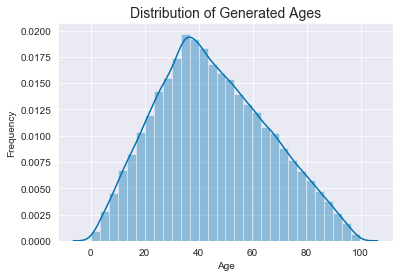

In [10]:
ageTri = np.random.triangular(0, ageMode, 100, 100000)
sns.distplot(ageTri, bins = 30) # Plot the distribution
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Generated Ages', fontsize=14)

The above distribution looks fairly reasonable, but it is of course an array of floats and I really only care about ages an integers. I can convert it fairly easily.

In [11]:
np.rint(ageTri) # Round each value to its nearest integer equivalent

array([79., 27., 34., ..., 26., 53., 30.])

This looks perfect now. Next I'd like to get rid of the ages outside of my range.

In [12]:
ageTri = ageTri[ageTri >= 25] # Subset the data where age is 25 or over
ageTri = ageTri[ageTri < 65] # Subset the data where age is under 65

Some more tweaks to the array I'd like to do are: 1. convert all ages to integers and 2. sort them into numerical order.

In [13]:
ageTri = np.sort(ageTri) # Sort into ascending order
ageTri

array([25.00320166, 25.0034078 , 25.00442486, ..., 64.99567427,
       64.99759573, 64.9993077 ])

The array is now a sorted array of integers. I'll have a look at its shape (i.e. its size) now:

In [14]:
ageTri.shape[0]

63402

I'll also check its unique values to make sure it has everything I need.

In [15]:
uniqueVals = np.unique(ageTri)
uniqueVals

array([25.00320166, 25.0034078 , 25.00442486, ..., 64.99567427,
       64.99759573, 64.9993077 ])

Its still several orders of magnitude bigger than what I need. The next step is a tricky one - reducing the array down into 334 figures whilst conserving the distribution.

It would be straightforward to do this if the existing array was evenly divisible by the required sample size - this is not the case as the number of elements in the existing array is pseudo-randomly generated. Instead, I will have to manually step through the array to pick out 334 evenly spaced numbers.

In [16]:
ssize = 334 # Required sample size
skip = ageTri.shape[0]/ssize # Number of entries to be skipped if I take every ssize'th item
print("Skip value:", skip)

Skip value: 189.82634730538922


Now that I have the skip (or step) size, I'll create an empty array and fill it from the existing array using a loop, using the skip value to jump through it in even steps - thankfully I've sorted it by size or I'd be extracting random values.

In [17]:
skipArr = np.array([0]) # Create an empty array to hold my values
skipCurrent = 0.0 # Instantiate
skipTotal = 0 # Instantiate

# Keep running until the skiptotal value reaches or exceeds the number of items in the existing array
while skipTotal < ageTri.shape[0]:
    skipCurrent = skipCurrent + skip # Update the skipcurrent value
    skipTotal = int(round(skipCurrent,0)) # Set the skiptotal value
    skipArr = np.append(skipArr, skipTotal) # Append this value to the output array

The array that I've just created is an array of integers to be used as indices to extract elements from the existing array of ages. Now I'll build an empty array to fill up with the required sample size.

In [18]:
ageTriSub = np.array([]) # Create empty numpy array

A simple for loop can now iterate through the array of skip values, selecting the required index from the existing age array and appending it to the output array.

In [19]:
for i in skipArr:
    if i <= np.argmax(ageTri): # Keep iterating until it reaches or exceeds the maximum index in the input array
        ageTriSub = np.append(ageTriSub, ageTri[i]) # Append to output array

At this point I'd like to have a look at the values generated:

In [20]:
ageTriSub

array([25.00320166, 25.11831527, 25.24915749, 25.38594123, 25.53499448,
       25.6689512 , 25.7969942 , 25.9269881 , 26.04937722, 26.17849465,
       26.30761499, 26.44384898, 26.57294139, 26.69373579, 26.82765627,
       26.93769379, 27.05163909, 27.17522771, 27.30197464, 27.44440649,
       27.56338125, 27.70046199, 27.83102931, 27.95657044, 28.06719958,
       28.1920679 , 28.31365992, 28.44096193, 28.56527595, 28.69118001,
       28.81804257, 28.94037844, 29.06335538, 29.1865032 , 29.30109786,
       29.41636809, 29.53215254, 29.64663129, 29.7711083 , 29.87413464,
       30.00033773, 30.10706941, 30.22667458, 30.34283946, 30.452483  ,
       30.5692185 , 30.67912372, 30.79774097, 30.89988304, 31.02684297,
       31.13500764, 31.26006943, 31.36662102, 31.48207294, 31.58620624,
       31.6933414 , 31.80050692, 31.91087567, 32.01584208, 32.14064221,
       32.24905977, 32.34809316, 32.4528952 , 32.56184323, 32.66571552,
       32.75173346, 32.85840167, 32.96815046, 33.07409322, 33.18

This looks fine. I should also check that it has the correct number of elements:

In [21]:
ageTriSub.shape[0]

334

This is perfect. Now that I know I have the right number of items I can look it its properties. Firstly, its distribution:

Text(0.5, 1.0, 'Distribution of Generated Ages (Truncated)')

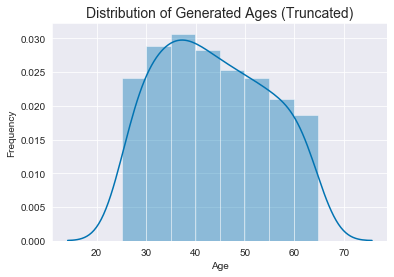

In [22]:
sns.distplot(ageTriSub)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Generated Ages (Truncated)', fontsize=14)

Visually, it looks fine. But I'll confirm by comparing the means and standard deviations:

In [23]:
print("Full dataset mean:", ageTri.mean())
print("Full dataset stdev:", ageTri.std())

print("\nSub dataset mean:",ageTriSub.mean())
print("Sub dataset stdev:", ageTriSub.std())

Full dataset mean: 43.733759389144005
Full dataset stdev: 10.961107158957164

Sub dataset mean: 43.67418676027459
Sub dataset stdev: 10.954501005898809


They're not exactly the same but they are very close - this is to be expected. They're also very close to the weighted mean and standard deviation of the Census age profile above. I'm almost ready to add them to my overall DataFrame. I'll just convert them to integers first, and then add to the Age column.

In [24]:
np.rint(ageTriSub) # Round to the nearest integer equivalent
df['Age'] = ageTriSub.astype(int) # Cast as integers to the Age column of the DataFrame

For convenience I'll add the age ranges as a column also. These will be useful for comparisons later, but I can delete the column from the DataFrame at the end.

In [25]:
df.loc[df['Age'] <= 34, "Age_Range"] = "25-34" # Use slicing to pick out rows with the specified age values and create the required value in the (new) Age_Range column
df.loc[(df['Age'] > 34) & (df['Age'] <=44), "Age_Range"] = "35-44"
df.loc[(df['Age'] > 44) & (df['Age'] <=54), "Age_Range"] = "45-54"
df.loc[df['Age'] > 54, "Age_Range"] = "55-64"
df

,Age,Age_Range
0,25,25-34
1,25,25-34
2,25,25-34
3,25,25-34
4,25,25-34
5,25,25-34
6,25,25-34
7,25,25-34
8,26,25-34
9,26,25-34


The DataFrame is starting to take shape. I'll also extract the Age Ranges to a series for later use.

In [26]:
ageRanges = df['Age_Range']

### Field of Study Data

I'm now ready to move on to look at the Fields of Study. I can import the relevant table excel file and create a DataFrame from it.

In [27]:
f = pd.read_excel("data\AES2017TBL2b.xlsx") # Import xlsx file using pandas
dfField = pd.DataFrame(f) # Create a dataframe from the csv data
dfField

,"Table 2b Persons aged 25-64 who participated in formal education, classified by the field of education participation, 20171",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,% of persons
1,Demographic Profile,NaN,Generic programmes and qualifications,Education,Art and humanities,"Social sciences, journalism and information","Business, administration and law","Natural sciences, mathematics and statistics",Information and communication technologies,"Engineering, manufacturing and construction","Agriculture, forestry, fisheries and veterinary",Health and welfare,Services,Other2,Unweighted sample
2,State,NaN,5.7,8.2,4.7,1.5,27.1,3.7,6.7,7.1,2.8,18,2.2,12.2,334
3,Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Male,10.3,3.6,2.6,0.8,22.7,6.8,7.6,13.3,4.7,12.3,2.3,13.2,122
5,NaN,Female,2.5,11.4,6.2,2,30.1,1.6,6.2,2.8,1.5,22.1,2.1,11.5,212
6,Age group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,25-34,6.6,8.1,1.7,0.6,30,5.9,10.4,8.9,1.8,15.2,1.4,9.3,106
8,NaN,35-44,6.8,8.4,7.8,0.6,28.6,1.5,2.9,6.5,5.5,15.2,0.9,15.3,113
9,NaN,45-54,2.2,9.9,3.5,2.2,20.5,4.1,6.4,5.4,0,27.1,6.4,12.3,79


Ok, because the data was quite messy and I didn't tidy it up before import, I'll have to edit the DataFrame. Firstly I'll drop the rows and columns that I don't need.

In [28]:
dfField.drop(dfField.loc[11:].index, axis=0, inplace=True) # Drop all rows from row 11 onwards
dfField.drop([0, 2, 3, 6], axis=0, inplace=True) # Drop specific rows
dfField.drop(dfField.columns[[0, 14]], axis=1, inplace=True) # Drop first and last column

Now that this is done, I'd like to rename the columns to match the field names that I created earlier.

In [29]:
dfField.columns = ['ITEM', 'GEN', 'EDU', 'ART', 'SOC', 'BUS', 'NAT', 'INF', 'ENG', 'AGR', 'HEA', 'SER', 'OTH'] # Set column names
dfField.drop([1], axis=0, inplace=True) # Drop the row containing the long version of the column names
dfField

,ITEM,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH
4,Male,10.3,3.6,2.6,0.8,22.7,6.8,7.6,13.3,4.7,12.3,2.3,13.2
5,Female,2.5,11.4,6.2,2,30.1,1.6,6.2,2.8,1.5,22.1,2.1,11.5
7,25-34,6.6,8.1,1.7,0.6,30,5.9,10.4,8.9,1.8,15.2,1.4,9.3
8,35-44,6.8,8.4,7.8,0.6,28.6,1.5,2.9,6.5,5.5,15.2,0.9,15.3
9,45-54,2.2,9.9,3.5,2.2,20.5,4.1,6.4,5.4,0,27.1,6.4,12.3
10,55-64,[3.3]3,[2.8],[11.2],[9.4],[17.7],[0.0],[3.8],[3.4],[3.5],[26.8],[2.8],[15.3]


This looks much better. But its still not ideal. Pandas will have imported all of the numbers as text - also any square brackets and superscript numbers (i.e. note references) have been included. I'll use Pandas functions including replace with regex to get rid of them (Pandas.pydata.org, 2019).

In [30]:
fieldList = list(dfField.columns.values) # Extract column names to a list
dfField.replace(to_replace=r'\[||\]\d||\]', value='', regex=True, inplace=True) # Use regex to get rid of the unnecessary items in the cells
dfField.index  = dfField['ITEM'] # Change index to Item column
dfField.drop(dfField.columns[[0]], axis=1, inplace=True) # Drop the Item column

for col in fieldList[1:]: # Iterate over each Column after the Item column
    dfField[col] = dfField[col].astype(float) # Replace existing values with floats
dfField

,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH
ITEM,,,,,,,,,,,,
Male,10.3,3.6,2.6,0.8,22.7,6.8,7.6,13.3,4.7,12.3,2.3,13.2
Female,2.5,11.4,6.2,2.0,30.1,1.6,6.2,2.8,1.5,22.1,2.1,11.5
25-34,6.6,8.1,1.7,0.6,30.0,5.9,10.4,8.9,1.8,15.2,1.4,9.3
35-44,6.8,8.4,7.8,0.6,28.6,1.5,2.9,6.5,5.5,15.2,0.9,15.3
45-54,2.2,9.9,3.5,2.2,20.5,4.1,6.4,5.4,0.0,27.1,6.4,12.3
55-64,3.3,2.8,11.2,9.4,17.7,0.0,3.8,3.4,3.5,26.8,2.8,15.3


This is exactly what I wanted - a table of probabilities for each Field of Study broken down by gender and age range.

The next thing I need to do it to create a Field column in my main DataFrame and fill it by generating fields of study based on the probabilities from the above table. As this will be repetitive, I'll define a function that will do it for me:

In [31]:
def fieldGen(item): # Takes a single input argument
    probSer = pd.Series(dfField.loc[(item)].values) # Create a series of probability values by using the input argument to slice the Field DataFrame and extract its values
    probList = probSer/100 # Turn the above into a list with each value divided by 100 (every value will then be a multiplier between 0 and 1)
    probList /= probList.sum() # normalise to add up to 1 (user2314737, 2019)
    x = np.random.choice(fieldList[1:], 1, p=list(probList)) # Use numpy's random.choice function to pick an item from the list of fields, based on the probabilities extracted from the field dataframe
    return x[0] # Return the first element from x

Now that my function has been built, I can call it using a loop to fill a list.

In [32]:
genFieldList = [] # Instantiate empty list
for i in ageRanges: # Iterate over each item in the ageRanges list
    x = fieldGen(i) # Call the function to generate a Field of Study on the current iterator value
    genFieldList.append(x) # Append to output list

df['Field'] = genFieldList # Create a Field column and fill from this list
df

,Age,Age_Range,Field
0,25,25-34,BUS
1,25,25-34,INF
2,25,25-34,BUS
3,25,25-34,BUS
4,25,25-34,BUS
5,25,25-34,SER
6,25,25-34,GEN
7,25,25-34,BUS
8,26,25-34,EDU
9,26,25-34,BUS


This looks good - the DataFrame is now halfway complete.

### Qualification Data

Creation of the Qualification Levels is very similar to the Fields of Study. Again, I will import the data from an excel sheet.

In [33]:
f = pd.read_excel("data\AES2017TBL2a.xlsx") # Import xlsx file using pandas
dfQual = pd.DataFrame(f) # Create a dataframe from the csv data
dfQual

,"Table 2a Persons aged 25-64 who participated in formal education, classified by the level of education participation, 20171",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,% of persons
1,Demographic Profile,NaN,Higher secondary or below,Post Leaving Certificate,Third Level non honours degree,Third Level honours degree or higher,Unweighted sample
2,State,NaN,14.6,30.3,17.6,37.5,334
3,Sex,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Male,17.3,23.4,25,34.3,122
5,NaN,Female,12.7,35.2,12.4,39.7,212
6,Age group,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,25-34,15.1,20.4,22.5,42.1,106
8,NaN,35-44,15.1,36.7,12.2,35.9,113
9,NaN,45-54,5,38.5,21.8,34.7,79


A similar amount of modification will be needed, such as dropping rows and columns.

In [34]:
dfQual.drop(dfQual.loc[11:].index, axis=0, inplace=True) # Drop all rows from row 11 onwards
dfQual.drop([0, 2, 3, 6], axis=0, inplace=True) # Drop specific rows
dfQual.drop(dfQual.columns[[0, 6]], axis=1, inplace=True) # Drop first and last column

I'll also rename the columns as I need them and drop the now unnecessary header row.

In [35]:
dfQual.columns = ['ITEM', 'SEC', 'PLC', '3LO', '3LH'] # Set column names
dfQual.drop([1], axis=0, inplace=True) # Drop the row containing the long version of the column names
dfQual

,ITEM,SEC,PLC,3LO,3LH
4,Male,17.3,23.4,25,34.3
5,Female,12.7,35.2,12.4,39.7
7,25-34,15.1,20.4,22.5,42.1
8,35-44,15.1,36.7,12.2,35.9
9,45-54,5,38.5,21.8,34.7
10,55-64,[32.8]2,[40.6],[3.6],[23.1]


As before, I'll remove all of the unnecessary items from the cells and convert the remaining values to floating point numbers (Pandas.pydata.org, 2019).

In [36]:
qualList = list(dfQual.columns.values) # Extract column names to a list
dfQual.replace(to_replace=r'\[||\]\d||\]', value='', regex=True, inplace=True) # Use regex to get rid of the unnecessary items in the cells
dfQual.index  = dfQual['ITEM'] # Change index to Item column
dfQual.drop(dfQual.columns[[0]], axis=1, inplace=True) # Drop the Item column

for col in qualList[1:]: # Iterate over each Column after the Item column
    dfQual[col] = dfQual[col].astype(float) # Replace existing values with floats
dfQual

,SEC,PLC,3LO,3LH
ITEM,,,,
Male,17.3,23.4,25.0,34.3
Female,12.7,35.2,12.4,39.7
25-34,15.1,20.4,22.5,42.1
35-44,15.1,36.7,12.2,35.9
45-54,5.0,38.5,21.8,34.7
55-64,32.8,40.6,3.6,23.1


The table is now ready for use. Again, I'll create a function to do most of the work of generating qualification levels from the ages.

In [37]:
def qualGen(item): # Takes a single input argument
    probSer = pd.Series(dfQual.loc[(item)].values) # Create a series of probability values by using the input argument to slice the Qualification DataFrame and extract its values
    probList = probSer/100 # Turn the above into a list with each value divided by 100 (every value will then be a multiplier between 0 and 1)
    probList /= probList.sum() # normalise to add up to 1 (user2314737, 2019)
    x = np.random.choice(qualList[1:], 1, p=list(probList)) # Use numpy's random.choice function to pick an item from the list of qualifications, based on the probabilities extracted from the qualificationdataframe
    return x[0] # Return the first element from x

In [38]:
genQualList = [] # Instantiate empty list
for i in ageRanges: # Iterate over each item in the ageRanges list
    x = qualGen(i) # Call the function to generate a Qualification level on the current iterator value
    genQualList.append(x) # Append to output list

df['Qual'] = genQualList # Create a Qual column and fill from this list
df

,Age,Age_Range,Field,Qual
0,25,25-34,BUS,PLC
1,25,25-34,INF,3LO
2,25,25-34,BUS,3LH
3,25,25-34,BUS,3LH
4,25,25-34,BUS,3LO
5,25,25-34,SER,3LH
6,25,25-34,GEN,3LH
7,25,25-34,BUS,3LO
8,26,25-34,EDU,SEC
9,26,25-34,BUS,PLC


This was simply a slight tweaking of the method used to generate Fields of Study - but I now have 3 of the 4 variables that I planned on simulating.

### Gender Data

Generating genders will be significantly more complex than the previous variables! It will have to take into account the proportion of the gender overall in the original list, as well as reverse-engineering the probability of each gender undertaking a particular field of study and qualification level, based on the Fields and Qualifications DataFrames created above.

The gender column will be a categorical variable, either "F" or "M", unlike the Age column (integers) or the Field and Qual columns (floats). I'll set the required parameters as follows:

In [39]:
genders = ["F", "M"] # List of genders
genderF = 212 # Number of females surveyed
genderM = 122 # Number of males surveyed

#### Calculate Gender Likelihood for Fields of Study

Now I can build a DataFrame using the columns from the Field of Study DataFrame.

In [40]:
dfGenField = pd.DataFrame(columns = fieldList[1:]) # Build a dataframe from the list elements (excluding the Item column)
dfGenField

,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH


I now need to weight the percentages that I have in the Fields DataFrame in order to take into account the relative proportions of Females and Males in the survey.

In [41]:
fieldM = dfField.loc['Male', :] * genderM # Build a list of male percentages weighted by the number of males in the overall dataset
fieldF = dfField.loc['Female', :] * genderF # Build a list of female percentages weighted by the number of females in the overall dataset

fieldMPer = [] # Instantiate empty list to hold values of proportions of males
fieldFPer = [] # Instantiate empty list to hold values of proportions of males

for i in range(len(fieldM)): # Iterate over the the number of items in the fieldM list
    x = (fieldM[i] + fieldF[i]) # Total proportions for Male and Female for current item

    y = fieldM[i]/x # Extract proportion of males
    fieldMPer.append(y) # Append to list
    
    z = fieldF[i]/x # Extract proportion of males
    fieldFPer.append(z) # Append to list

I'll now use these percentages to fill out my dfGenField DataFrame.

In [42]:
dfGenField=dfGenField.append(pd.Series(fieldMPer, index=dfGenField.columns), ignore_index=True) # Append a row to DataFrame from the list of proportions of males
dfGenField=dfGenField.append(pd.Series(fieldFPer, index=dfGenField.columns), ignore_index=True) # Append a row to DataFrame from the list of proportions of females
dfGenField.index = ['Male%', 'Female%'] # Create index
dfGenField

,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH
Male%,0.703347,0.153782,0.19441,0.187117,0.302647,0.709788,0.413633,0.732154,0.643258,0.242588,0.386608,0.397787
Female%,0.296653,0.846218,0.80559,0.812883,0.697353,0.290212,0.586367,0.267846,0.356742,0.757412,0.613392,0.602213


This DataFrame is now complete - one half of the puzzle. Now I'll carry out a similar process to get percentages of each gender for Qualification levels.

#### Calculate Gender Likelihood for Qualification Level

I'll build an empty DataFrame first, like before.

In [43]:
dfGenQual = pd.DataFrame(columns = qualList[1:]) # Build a dataframe from the list elements (excluding the Item column)
dfGenQual

,SEC,PLC,3LO,3LH


I'll weight the percentages that I have in the Quals DataFrame in order to take into account the relative proportions of Females and Males in the survey.

In [44]:
qualM = dfQual.loc['Male', :] * genderM # Build a list of male percentages weighted by the number of males in the overall dataset
qualF = dfQual.loc['Female', :] * genderF # Build a list of female percentages weighted by the number of females in the overall dataset

qualMPer = [] # Instantiate empty list to hold values of proportions of males
qualFPer = [] # Instantiate empty list to hold values of proportions of males

for i in range(len(qualM)): # Iterate over the the number of items in the qualM list
    x = qualM[i] + qualF[i] # Total proportions for Male and Female for current item
    
    y = qualM[i]/x # Extract proportion of males
    qualMPer.append(y) # Append to list
    
    z = qualF[i]/x # Extract proportion of males
    qualFPer.append(z) # Append to list

I'll use these percentages to fill out my dfGenQual DataFrame.

In [45]:
dfGenQual=dfGenQual.append(pd.Series(qualMPer, index=dfGenQual.columns), ignore_index=True) # Append a row to DataFrame from the list of proportions of males
dfGenQual=dfGenQual.append(pd.Series(qualFPer, index=dfGenQual.columns), ignore_index=True) # Append a row to DataFrame from the list of proportions of females
dfGenQual.index = ['Male%', 'Female%'] # Create index
dfGenQual

,SEC,PLC,3LO,3LH
Male%,0.439434,0.276703,0.537085,0.332085
Female%,0.560566,0.723297,0.462915,0.667915


This DataFrame is now complete - one half of the puzzle. I have everything I need now to start calculating the gender based on Field of Study and Qualification Level.

#### Generate Genders

I'll define a function to calculate each value.

In [46]:
def probGen(i): # Accept one argument
    x = df['Field'].iloc[i] # Slice the Field column using the current iterator value
    y = df['Qual'].iloc[i] # Slice the Qual column using the current iterator value
    probM1 = dfGenField[x][0] # Extract male probability of a Field of Study
    probM2 = dfGenQual[y][0] # Extract male probability of a Qualification Level
    probMT = (probM1 + probM2)/2 # Overall male probability is the average of the two above
    probF1 = dfGenField[x][1] # Extract female probability of a Field of Study
    probF2 = dfGenQual[y][1] # Extract female probability of a Qualification Level
    probFT = (probF1 + probF2)/2 # Overall female probability is the average of the two above
    return probFT, probMT # Return the female probability and the male probability

Now I can call the function for each age in the Age column.

In [47]:
genProbList = [] # Instantiate empty list
for i in range(len(df['Age'])): # Loop for each item in the Age column
    x = np.random.choice(genders, 1, p=(probGen(i))) # Randomly select a gender from the allowed values, with given probabilities
    genProbList.append(x[0]) # Append to the list
    
genProbList

['F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F'

Now that the the list has been created, I'll build the final DataFrame column directly from it.

In [48]:
df['Gender'] = genProbList
df

,Age,Age_Range,Field,Qual,Gender
0,25,25-34,BUS,PLC,F
1,25,25-34,INF,3LO,M
2,25,25-34,BUS,3LH,M
3,25,25-34,BUS,3LH,F
4,25,25-34,BUS,3LO,F
5,25,25-34,SER,3LH,F
6,25,25-34,GEN,3LH,M
7,25,25-34,BUS,3LO,F
8,26,25-34,EDU,SEC,M
9,26,25-34,BUS,PLC,F


The DataFrame is complete now - but I still need to check that it simulates the data correctly.

#### Assessment of Simulated Data - Totals

The Age_Ranges column has not yet been deleted - it will be convenient for checking against the survey data. Firstly, the number for each field:

In [49]:
df['Field'].value_counts() # Count each unique value within the column

BUS    75
HEA    72
OTH    40
INF    28
EDU    25
ART    24
ENG    19
GEN    14
SER    12
AGR    11
NAT     8
SOC     6
Name: Field, dtype: int64

In [50]:
df['Qual'].value_counts() # Count each unique value within the column

3LH    107
PLC     99
3LO     65
SEC     63
Name: Qual, dtype: int64

In [51]:
df['Gender'].value_counts() # Count each unique value within the column

F    199
M    135
Name: Gender, dtype: int64

I've chosen not to seed the pseudo random number generator, but these values are generally representative of those in the survey.

#### Assessment of Simulated Data - Grouped by Age Range

It is necessary to compare the values within groups - first I'll group by each Age Range.

In [52]:
dfGrpAge = df.groupby('Age_Range') # Group by Age_Range value

Now I can count the value for each age group:

In [53]:
dfGrpAge['Qual'].value_counts() # Count each unique value within the column

Age_Range  Qual
25-34      3LH     32
           PLC     24
           3LO     19
           SEC     13
35-44      3LH     35
           PLC     26
           SEC     25
           3LO     12
45-54      3LO     29
           3LH     25
           PLC     21
           SEC      8
55-64      PLC     28
           SEC     17
           3LH     15
           3LO      5
Name: Qual, dtype: int64

In [54]:
dfGrpAge['Field'].value_counts()

Age_Range  Field
25-34      BUS      30
           INF      12
           HEA       8
           OTH       8
           GEN       7
           EDU       6
           ENG       6
           NAT       4
           AGR       2
           ART       2
           SER       2
           SOC       1
35-44      BUS      25
           HEA      20
           OTH      16
           EDU       9
           ART       8
           AGR       5
           GEN       5
           ENG       4
           INF       4
           NAT       1
           SER       1
45-54      HEA      26
           BUS      15
           OTH      10
           SER       8
           ENG       7
           INF       7
           EDU       5
           NAT       3
           ART       1
           SOC       1
55-64      HEA      18
           ART      13
           OTH       6
           BUS       5
           EDU       5
           INF       5
           AGR       4
           SOC       4
           ENG       2
           GEN   

These are also fairly representative of the survey carried out.

#### Assessment of Simulated Data - Grouped by Gender

Finally I will group by gender and assess that.

In [55]:
dfGrpGen = df.groupby('Gender') # Group by Gender value

Now I can count the value for each gender:

In [56]:
dfGrpGen['Qual'].value_counts()

Gender  Qual
F       3LH     69
        PLC     60
        SEC     36
        3LO     34
M       PLC     39
        3LH     38
        3LO     31
        SEC     27
Name: Qual, dtype: int64

In [57]:
dfGrpGen['Field'].value_counts()

Gender  Field
F       BUS      50
        HEA      47
        INF      19
        OTH      18
        ART      16
        EDU      12
        ENG      10
        SER       8
        AGR       7
        GEN       5
        SOC       4
        NAT       3
M       BUS      25
        HEA      25
        OTH      22
        EDU      13
        ENG       9
        GEN       9
        INF       9
        ART       8
        NAT       5
        AGR       4
        SER       4
        SOC       2
Name: Field, dtype: int64

Again, the values are relatively close to what I would expect.

## Results

In [58]:
df.drop(df.columns[[-1]], axis=1, inplace=True) # Drop last column
df

,Age,Age_Range,Field,Qual
0,25,25-34,BUS,PLC
1,25,25-34,INF,3LO
2,25,25-34,BUS,3LH
3,25,25-34,BUS,3LH
4,25,25-34,BUS,3LO
5,25,25-34,SER,3LH
6,25,25-34,GEN,3LH
7,25,25-34,BUS,3LO
8,26,25-34,EDU,SEC
9,26,25-34,BUS,PLC


The final result is shown above - a table with 334 rows, each describing an individual surveyed by simulating the dataset based on the characteristics of the variables and their relationships. It will generally not agree perfectly with the sample data - this is by design. The (pseudo-) randomness inherent in the process will ensure that this varies, and as the variables are related, randomness compounds across the variables as they are generated.

However, this project has shown that it is very much possible to generate simulated data using numpy.random in order to represent a real-world phenomenon.

## References

1. Cso.ie. (2019). Adult Education Survey 2017 - CSO - Central Statistics Office. [online] Available at: https://www.cso.ie/en/releasesandpublications/er/aes/adulteducationsurvey2017/ [Accessed 23 Nov. 2019].  

2. Statbank.cso.ie. (2019). Statbank Database - Summary Results Part 1 Listing Generated at 12:07 on 06NOV17. [online] Available at: https://statbank.cso.ie/px/pxeirestat/Database/eirestat/Summary%20Results%20Part%201/Summary%20Results%20Part%201_statbank.asp?SP=Summary%20Results%20Part%201&Planguage=0 [Accessed 2 Dec. 2019].  

3. Mordkoff, J. (2019). The Assumption(s) of Normality. [online] Www2.psychology.uiowa.edu. Available at: http://www2.psychology.uiowa.edu/faculty/mordkoff/GradStats/part%201/I.07%20normal.pdf [Accessed 29 Nov. 2019].  

4. Docs.scipy.org. (2019). numpy.random.triangular — NumPy v1.14 Manual. [online] Available at: https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.triangular.html [Accessed 6 Dec. 2019].  

5. Statistics How To. (2019). Weighted Mean: Formula: How to Find Weighted Mean. [online] Available at: https://www.statisticshowto.datasciencecentral.com/weighted-mean/ [Accessed 28 Nov. 2019].  

6. Pandas.pydata.org. (2019). pandas.DataFrame.replace — pandas 0.25.3 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html [Accessed 2 Dec. 2019].  

7. user2314737 (2019). np.random.choice: probabilities do not sum to 1. [online] Stack Overflow. Available at: https://stackoverflow.com/a/46539921 [Accessed 3 Dec. 2019].